# Problem Statement
Employee Attrition Prediction in Machine Learning Employee attrition, or employees leaving a company, is a common challenge for businesses. Losing employees can increase costs for hiring and training and disrupt the company’s operations.

This project aims to use machine learning to predict which employees are likely to leave the company based on data like their job role, performance, and satisfaction levels.

The goal is to help businesses identify employees at risk of leaving so they can take steps to keep them and improve overall employee satisfaction and productivity.

## IMPORTING LIBRARIES

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


In [47]:
df = pd.read_csv(r"Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


### INFORMATION OF DATA

In [48]:
def description(i):
    print("INFORMATION OF DATA")

    print("dataframe's shape")
    print(i.shape)
    print()

    print("*"*50)
    print("description of data frame ")
    print(i.describe())
    print()

    print("*"*50)
    print("Columns in data frame")
    print(i.columns)
    print()

    print("*"*50)
    print("missing values : ")
    print(i.isnull().sum())
    print()

    print("*"*50)
    print("INFO : ")
    print(i.info())
    print()


description(df)

INFORMATION OF DATA
dataframe's shape
(1470, 32)

**************************************************
description of data frame 
               Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.

## EDA ( Exploratory Data Analysis )
lets glance through the data and find out some insights

In [49]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

#### Age

<Axes: xlabel='Age', ylabel='Density'>

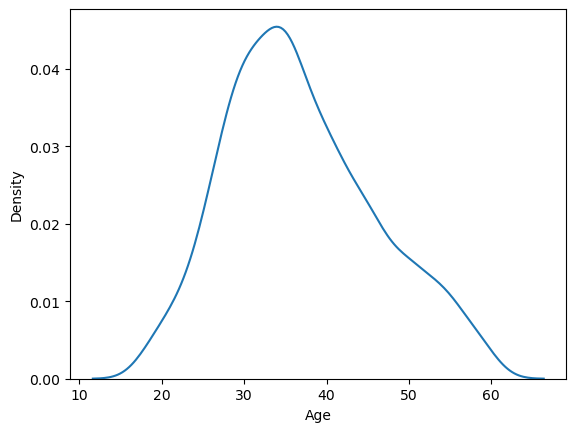

In [51]:
sns.kdeplot(df,x='Age')

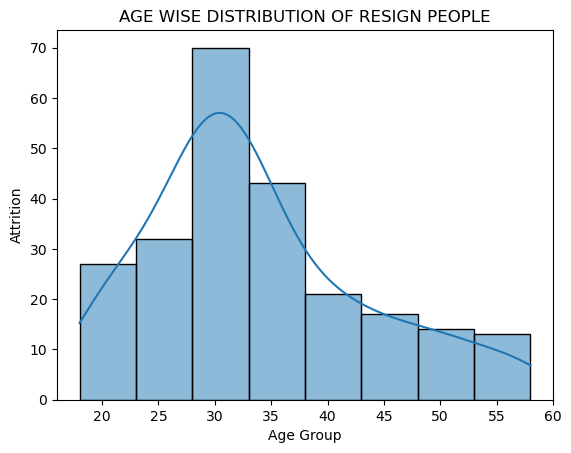

In [52]:
sns.histplot(df[df["Attrition"]=="Yes"] , x ="Age" , bins = 8 , palette="Set1",kde=True)
plt.xlabel("Age Group")
plt.ylabel("Attrition")
plt.title("AGE WISE DISTRIBUTION OF RESIGN PEOPLE")
plt.show()

<Axes: xlabel='Age'>

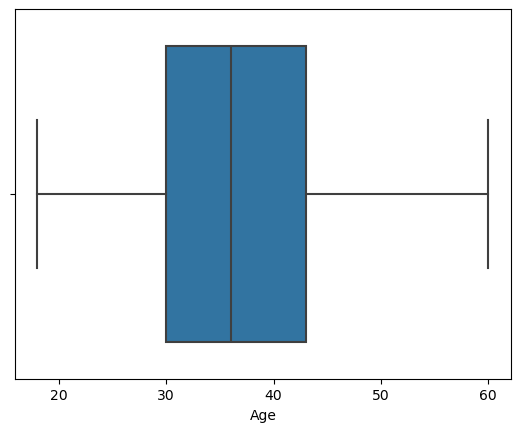

In [53]:
sns.boxplot(df , x ="Age")

#### Attrition  

<Axes: xlabel='Attrition', ylabel='count'>

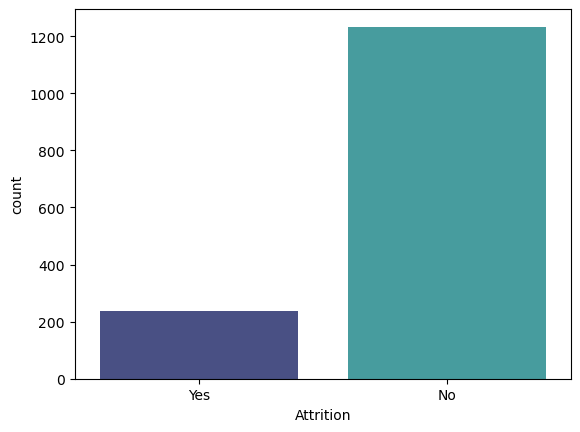

In [54]:
df["Attrition"].value_counts()
sns.countplot(x ="Attrition" , data =df , palette = "mako")

#### BusinessTravel

In [55]:
df["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

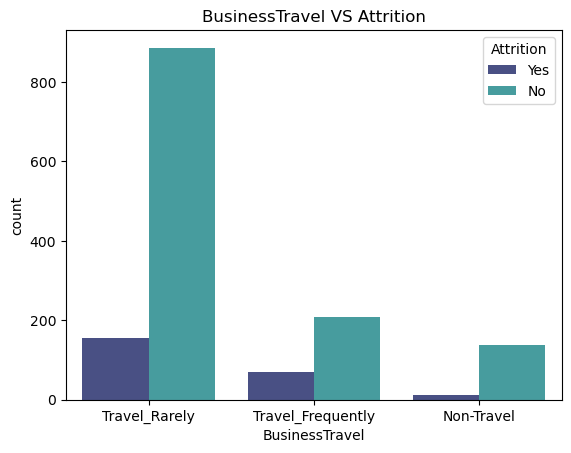

In [56]:
sns.countplot(df,x='BusinessTravel',hue="Attrition" ,palette='mako')
plt.title("BusinessTravel VS Attrition")
plt.show()

#### Department

In [57]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

#### DistanceFromHome

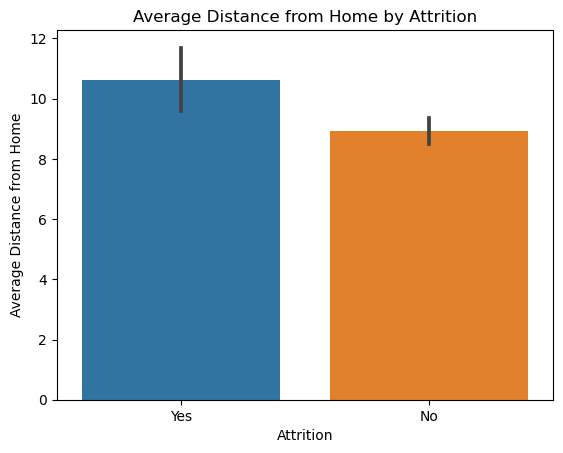

In [58]:
sns.barplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Average Distance from Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Distance from Home')
plt.show()

Observations: Employees who left have a slightly higher average distance from home compared to those who stayed.This see that distance from home might be a contributing factor to Attrition.

#### EducationField

In [59]:
education_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
education_level

,Education,MonthlyIncome
0,1,5640.570588
1,2,6226.645390
2,3,6517.263986
3,4,6832.402010
4,5,8277.645833


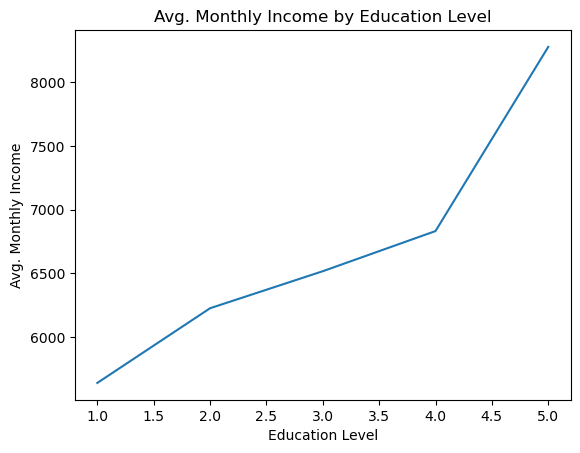

In [60]:
plt.plot(education_level['Education'],education_level['MonthlyIncome'])
plt.xlabel('Education Level')
plt.ylabel('Avg. Monthly Income')
plt.title('Avg. Monthly Income by Education Level')
plt.show()

The increase in income appears to accelerate at highter education levels(epescially after level 4)

#### EnvironmentSatisfaction , JobSatisfaction , RelationshipSatisfaction

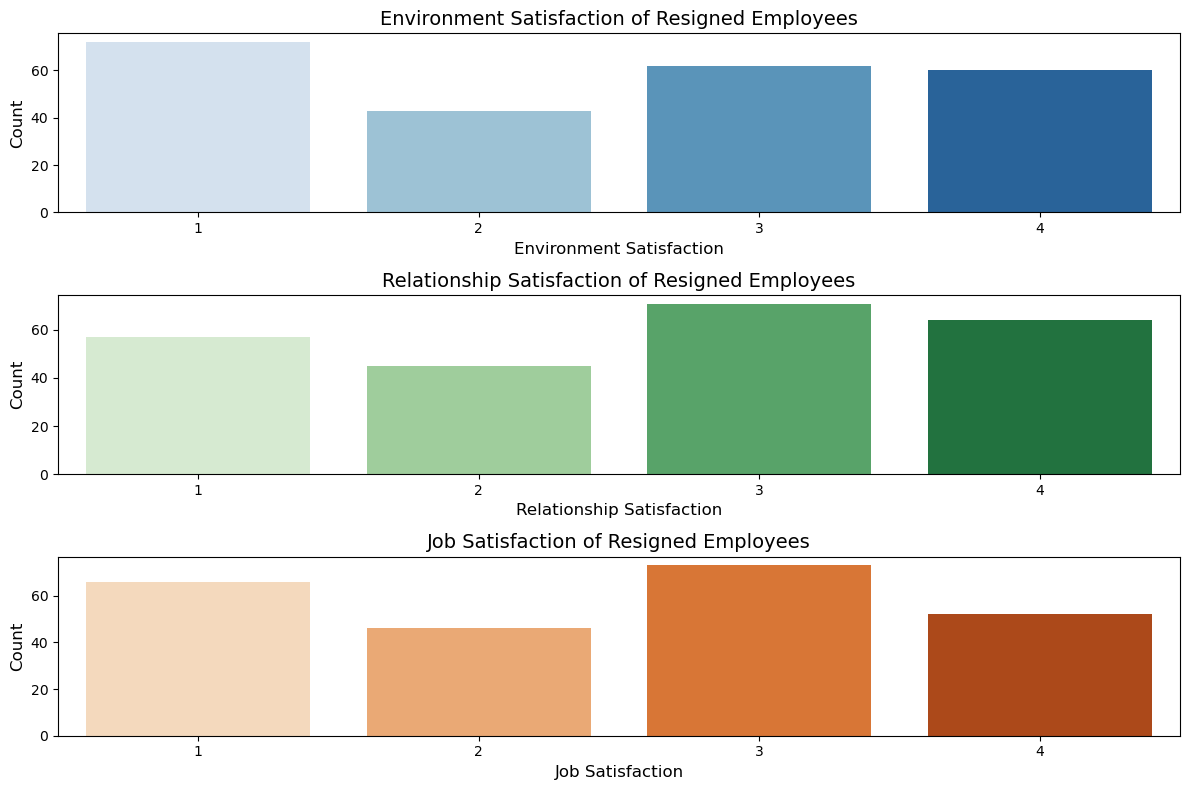

In [61]:
resigned_data = df[df['Attrition'] == "Yes"]
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.countplot(data=resigned_data, x='EnvironmentSatisfaction', palette='Blues')
plt.title("Environment Satisfaction of Resigned Employees", fontsize=14)
plt.xlabel("Environment Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(3, 1, 2)
sns.countplot(data=resigned_data, x='RelationshipSatisfaction', palette='Greens')
plt.title("Relationship Satisfaction of Resigned Employees", fontsize=14)
plt.xlabel("Relationship Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(3, 1, 3)
sns.countplot(data=resigned_data, x='JobSatisfaction', palette='Oranges')
plt.title("Job Satisfaction of Resigned Employees", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


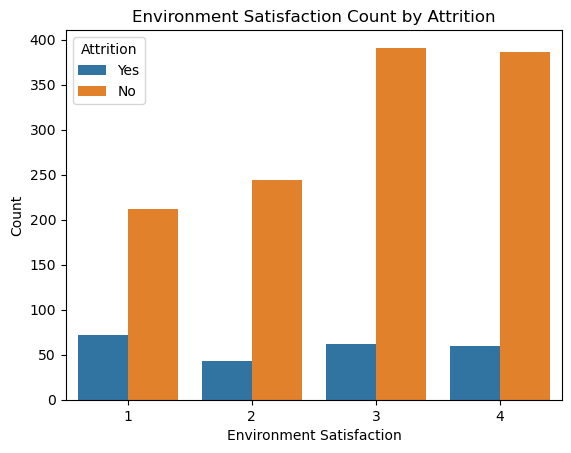

In [62]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Environment Satisfaction Count by Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


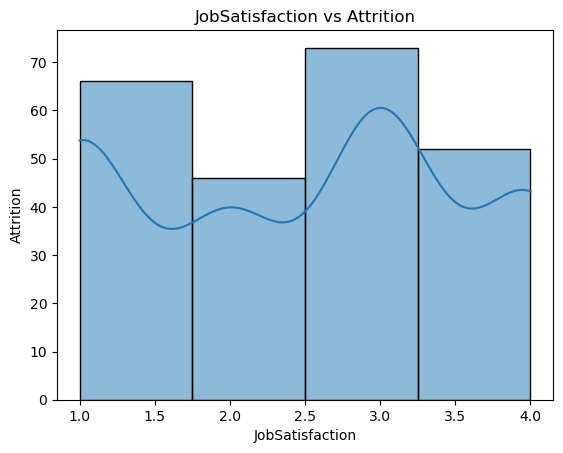

In [63]:
sns.histplot(df[df["Attrition"]=="Yes"] , x ="JobSatisfaction" , bins = 4 , palette="Set1",kde=True)
plt.xlabel("JobSatisfaction")
plt.ylabel("Attrition")
plt.title("JobSatisfaction vs Attrition")
plt.show()

#### Gender 

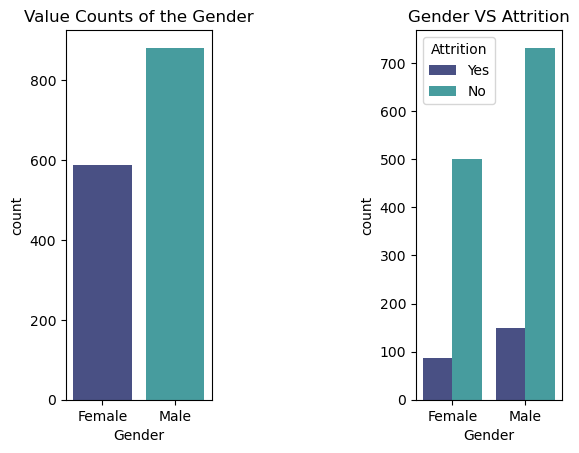

In [64]:
sns.countplot(df,x='Gender',axes=plt.subplot(1,3,1),palette='mako')
plt.title("Value Counts of the Gender")
sns.countplot(df,x='Gender',hue="Attrition" ,axes=plt.subplot(1,3,3),palette='mako')
plt.title("Gender VS Attrition")
plt.show()

The graph suggests that attrition is present in both genders with male employees being the majority in both categories

#### JobRole

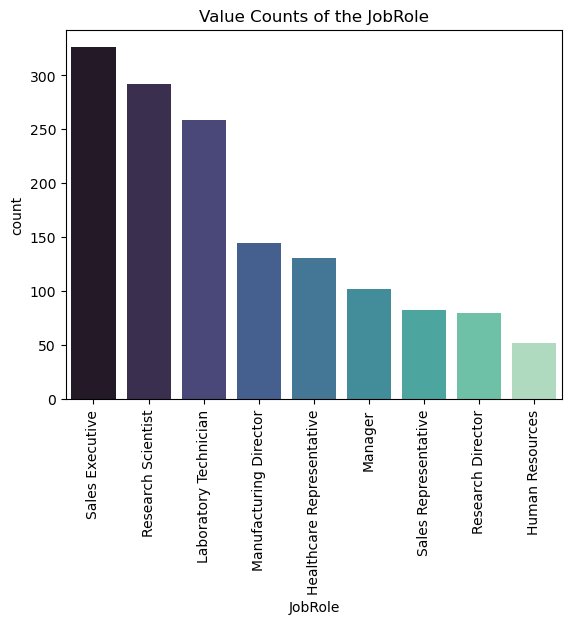

In [65]:
sns.countplot(df,x="JobRole",palette='mako')
plt.title("Value Counts of the JobRole")
plt.xticks(rotation=90)
plt.show()

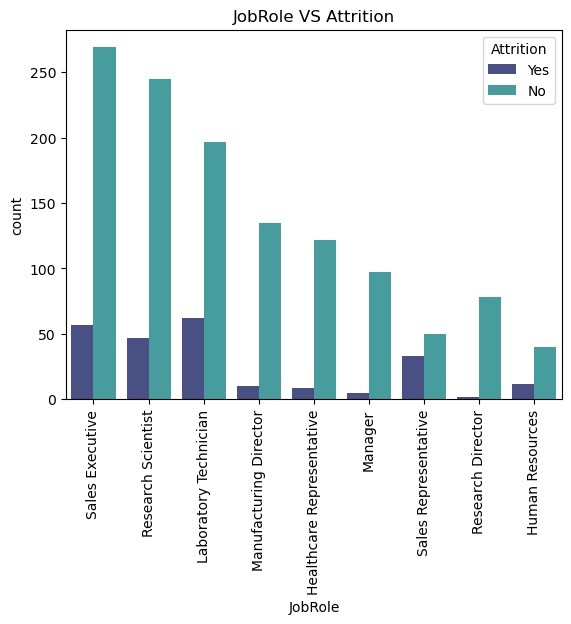

In [66]:
sns.countplot(df,x="JobRole",hue="Attrition",palette='mako')
plt.xticks(rotation=90)
plt.title("JobRole VS Attrition")
plt.show()

#### JobLevel 

In [67]:
job_level = df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index()
job_level

,JobLevel,MonthlyIncome
0,1,2786.915285
1,2,5502.277154
2,3,9817.252294
3,4,15503.783019
4,5,19191.826087


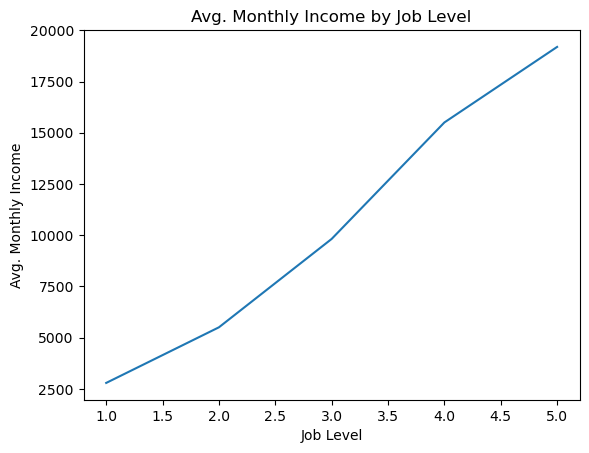

In [68]:
plt.plot(job_level['JobLevel'],job_level['MonthlyIncome'])
plt.xlabel('Job Level')
plt.ylabel('Avg. Monthly Income')
plt.title('Avg. Monthly Income by Job Level')
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

#### OverTime

In [70]:
df["OverTime"].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

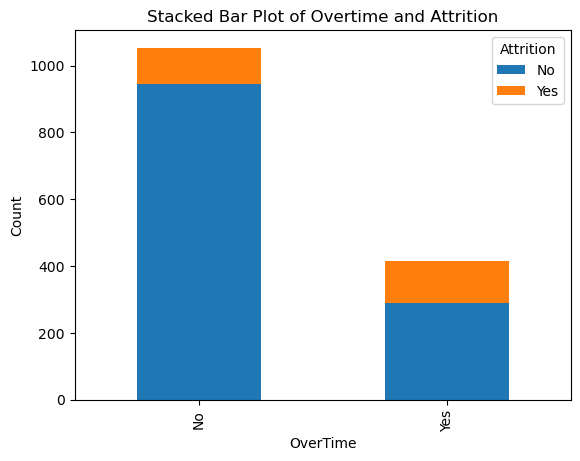

In [71]:
overtime_attrition = df.groupby(['OverTime', 'Attrition']).size().unstack()
overtime_attrition.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Overtime and Attrition")
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.show()


#### WorkLifeBalance

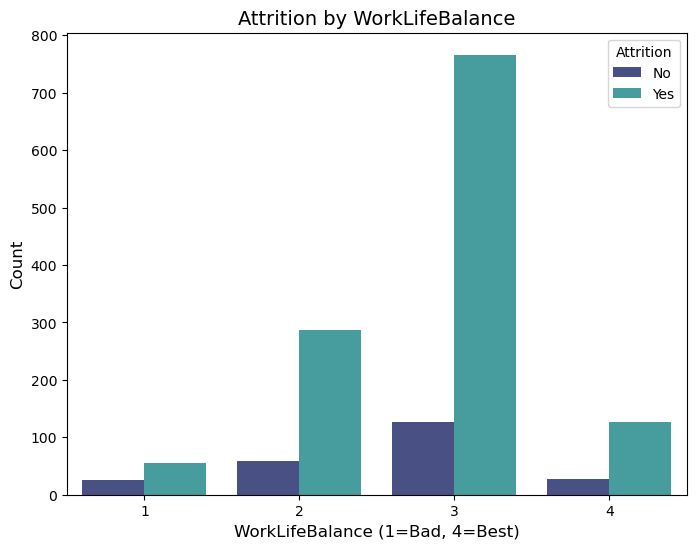

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="WorkLifeBalance", hue="Attrition", palette="mako")
plt.title("Attrition by WorkLifeBalance", fontsize=14)
plt.xlabel("WorkLifeBalance (1=Bad, 4=Best)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

#### MaritalStatus

In [73]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [74]:
data=df.groupby('MaritalStatus')["Attrition"].value_counts().reset_index()
data

,MaritalStatus,Attrition,count
0,Divorced,No,294
1,Divorced,Yes,33
2,Married,No,589
3,Married,Yes,84
4,Single,No,350
5,Single,Yes,120


#### Outliers

<Axes: xlabel='MonthlyIncome'>

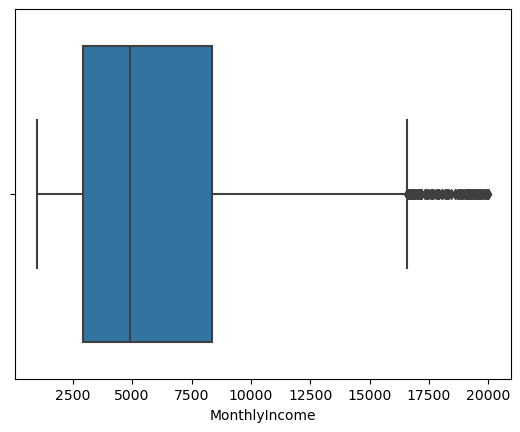

In [75]:
sns.boxplot(df , x ="MonthlyIncome")

<Axes: xlabel='TotalWorkingYears'>

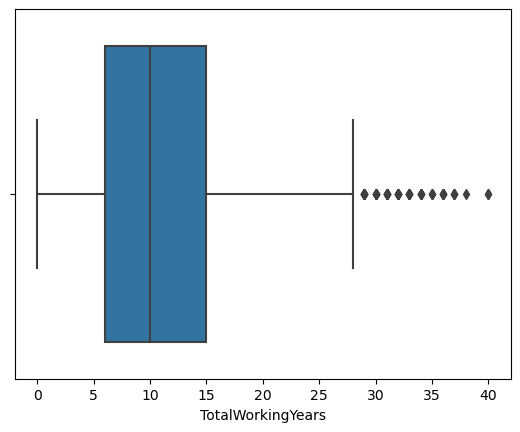

In [76]:
sns.boxplot(df , x="TotalWorkingYears")

<Axes: xlabel='YearsAtCompany'>

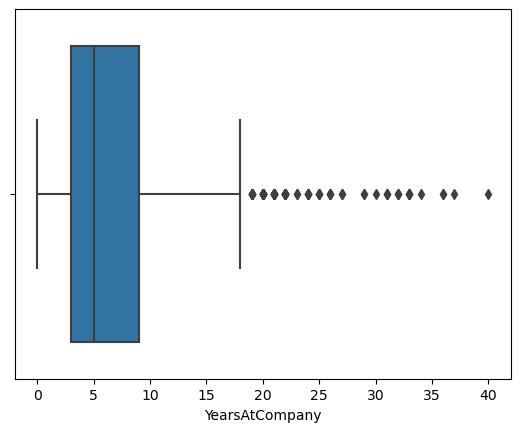

In [77]:
sns.boxplot(df , x="YearsAtCompany")

<Axes: xlabel='YearsInCurrentRole'>

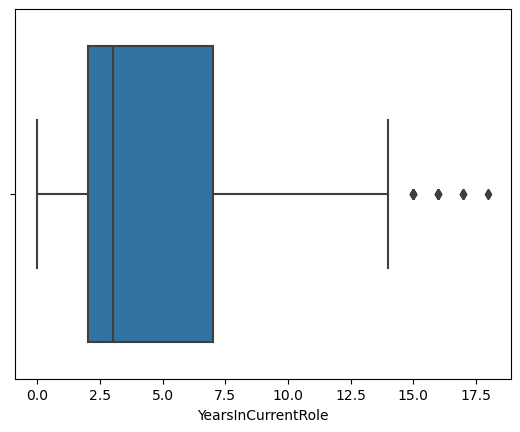

In [78]:
sns.boxplot(df , x="YearsInCurrentRole")

<Axes: xlabel='YearsSinceLastPromotion'>

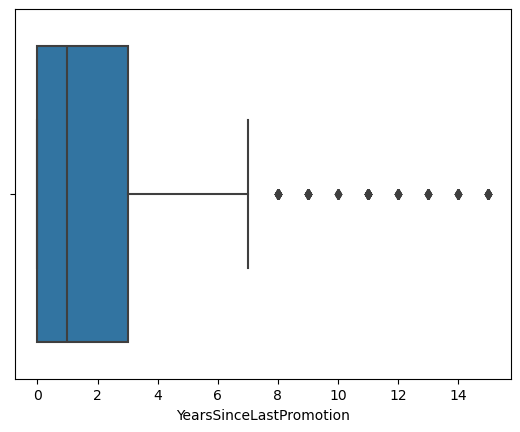

In [79]:
sns.boxplot(df , x="YearsSinceLastPromotion")

<Axes: xlabel='YearsWithCurrManager'>

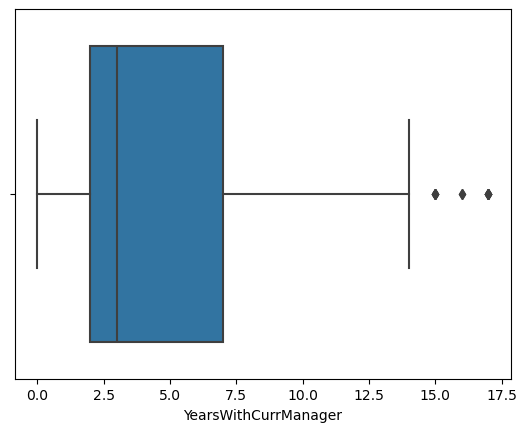

In [80]:
sns.boxplot(df , x="YearsWithCurrManager")

# Data Preprocessing

In [81]:
df.drop(["MonthlyRate","StockOptionLevel","EmployeeNumber","HourlyRate","TrainingTimesLastYear","DailyRate","NumCompaniesWorked"], 
        axis = 1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [82]:
encoded_columns  = ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in encoded_columns :
    df[col] = encoder.fit_transform(df[col])

## Handling outliers

In [83]:
columns_name = ["YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","MonthlyIncome","TotalWorkingYears"]
for col in columns_name:
    Q1 = np.percentile(df[col],25)
    Q2 = np.percentile(df[col],50)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    df[col][df[col] > max] = max
    df[col][df[col] < min] = min

#### BalanceTheData

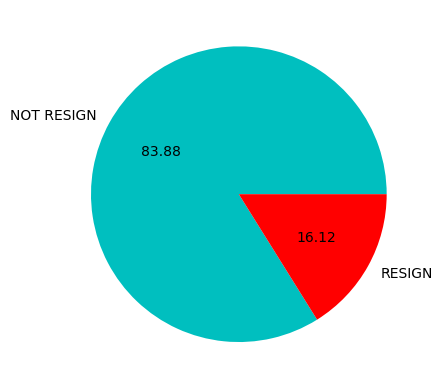

In [84]:
X_old=df.drop('Attrition',axis=1)
y_old=df['Attrition']
plt.pie(y_old.value_counts(),autopct="%.2f",labels=["NOT RESIGN","RESIGN"],colors='crest')
plt.show()

As we have a imbalanced data of target classes we balance it using SMOTE technique



Attrition
0    1233
1     801
Name: count, dtype: int64


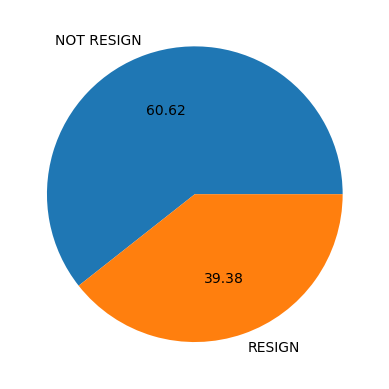

Resampled data saved to 'resampled_data.csv'


In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5,n_jobs=3,sampling_strategy=0.650)
X,y = smote.fit_resample(X_old,y_old)
print(y.value_counts())
plt.pie(y.value_counts(),autopct="%.2f",labels=["NOT RESIGN","RESIGN"])
plt.show()
resampled_data = pd.DataFrame(X, columns=X_old.columns) 
resampled_data['Attrition'] = y
resampled_data.to_csv("resampled_data.csv", index=False)
print("Resampled data saved to 'resampled_data.csv'")

we observe that 39.38 %people are resing form the job and data is balances



# MACHINE LEARNING

We will build the following models in this section :

1. LOGISTIC REGRESSION

2. XGBoost

3. KNN

4. Naive Bayes

5. Decision Tree

6. Random Forest

7. ADA Boost

## Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
X_train ,X_test , y_train ,y_test = train_test_split(X , y ,random_state=30, shuffle=True ,test_size=0.20,stratify=y)
model = LogisticRegression()

model.fit(X_train , y_train)
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test , y_pred)
print("Confusion_matrix :")
print(matrix)
print("*"*60)

report = classification_report(y_test, y_pred)
print("classification_report")
print(report)
print("*"*60)

Accuracy_score_LR = accuracy_score(y_test, y_pred)
print("Accuracy_score_LR :",Accuracy_score_LR)

Confusion_matrix :
[[211  36]
 [ 79  81]]
************************************************************
classification_report
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       247
           1       0.69      0.51      0.58       160

    accuracy                           0.72       407
   macro avg       0.71      0.68      0.69       407
weighted avg       0.71      0.72      0.71       407

************************************************************
Accuracy_score_LR : 0.7174447174447175


## XGBoost

In [87]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
xgboost.fit(X_train, y_train )
y_pred = xgboost.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix :")
print(conf_matrix)
print("*"*60)

report = classification_report(y_test, y_pred)
print("classification_report")
print(report)
print("*"*60)

Accuracy_score_XGBoost = accuracy_score(y_test, y_pred)
print("Accuracy_score_XGBoost :",Accuracy_score_XGBoost)

confusion_matrix :
[[235  20]
 [ 25 127]]
************************************************************
classification_report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       255
           1       0.86      0.84      0.85       152

    accuracy                           0.89       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.89      0.89      0.89       407

************************************************************
Accuracy_score_XGBoost : 0.8894348894348895


## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [90]:
knn = KNeighborsClassifier(n_neighbors = 1)
     
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print("*"*60)

print('Classification Report')
print(classification_report(y_test,y_pred))
print("*"*60)

Accuracy_score_KNN = accuracy_score(y_test,y_pred)
print("Accuracy_score_KNN :",Accuracy_score_KNN)
print("*"*60)

WITH K = 1
Confusion Matrix
[[189  66]
 [ 35 117]]
************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       255
           1       0.64      0.77      0.70       152

    accuracy                           0.75       407
   macro avg       0.74      0.76      0.74       407
weighted avg       0.77      0.75      0.76       407

************************************************************
Accuracy_score_KNN : 0.7518427518427518
************************************************************


For KNN we will choose K=1 because its the least K with highest accuracy score

## Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print("*"*60)

print('Classification Report')
print(classification_report(y_test,y_pred))
print("*"*60)

Accuracy_score_NB = accuracy_score(y_test,y_pred)
print("Accuracy_score_NB :",Accuracy_score_NB)

Confusion Matrix
[[163  92]
 [ 48 104]]
************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       255
           1       0.53      0.68      0.60       152

    accuracy                           0.66       407
   macro avg       0.65      0.66      0.65       407
weighted avg       0.68      0.66      0.66       407

************************************************************
Accuracy_score_NB : 0.6560196560196561


## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print("*"*60)

print('Classification Report')
print(classification_report(y_test,y_pred))
print("*"*60)

Accuracy_score_DT = accuracy_score(y_test,y_pred)
print("Accuracy_score_DT:",Accuracy_score_DT)

Confusion Matrix
[[175  80]
 [ 50 102]]
************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       255
           1       0.56      0.67      0.61       152

    accuracy                           0.68       407
   macro avg       0.67      0.68      0.67       407
weighted avg       0.70      0.68      0.68       407

************************************************************
Accuracy_score_DT: 0.6805896805896806


## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

regressor =RandomForestClassifier (n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print("*"*60)

print('Classification Report')
print(classification_report(y_test,y_pred))
print("*"*60)

Accuracy_score_RF = accuracy_score(y_test,y_pred)
print("Accuracy_score_RF :",Accuracy_score_RF)

Confusion Matrix
[[236  19]
 [ 43 109]]
************************************************************
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       255
           1       0.85      0.72      0.78       152

    accuracy                           0.85       407
   macro avg       0.85      0.82      0.83       407
weighted avg       0.85      0.85      0.84       407

************************************************************
Accuracy_score_RF : 0.8476658476658476


## ADA Boost


In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

adaboost = AdaBoostClassifier( n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print("*"*60)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("*"*60)

Accuracy_score_ADA = accuracy_score(y_test,y_pred)
print("Accuracy_score_ADA :",Accuracy_score_ADA)

Confusion Matrix
[[220  35]
 [ 35 117]]
************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       255
           1       0.77      0.77      0.77       152

    accuracy                           0.83       407
   macro avg       0.82      0.82      0.82       407
weighted avg       0.83      0.83      0.83       407

************************************************************
Accuracy_score_ADA : 0.828009828009828


In [103]:
models = ["LOGISTIC REGRESSION","XGBoost","KNN","Naive Bayes","Decision Tree","Random Forest","ADA Boost"]
ACCURACY_SCORE = pd.Series(data=[Accuracy_score_LR , Accuracy_score_XGBoost , Accuracy_score_KNN , Accuracy_score_NB , Accuracy_score_DT
                                ,Accuracy_score_RF,Accuracy_score_ADA],index=models)

XGBoost                0.889435
Random Forest          0.847666
ADA Boost              0.828010
KNN                    0.751843
LOGISTIC REGRESSION    0.717445
Decision Tree          0.680590
Naive Bayes            0.656020
dtype: float64


Text(0.5, 1.0, 'MODELS vs ACCURACY SCORE')

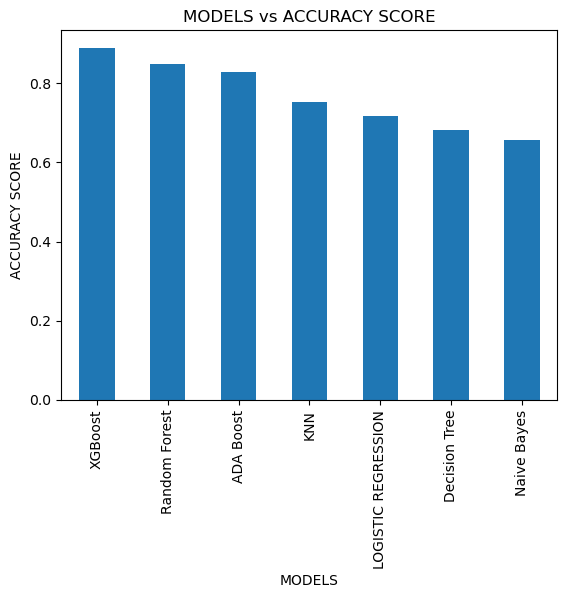

In [104]:
ACCURACY_SCORE.sort_values(ascending=False).plot(kind='bar')
print(ACCURACY_SCORE.sort_values(ascending=False))
plt.xlabel("MODELS")
plt.ylabel("ACCURACY SCORE")
plt.title("MODELS vs ACCURACY SCORE")

XGBoost appears to have the highest accuracy score(close to 0.9)

Models like Random Forest, ADA Boost and KNN also show relatively high accuracy but are slightly lower than XGBoost.